## Лабороторная работа по статистике

In [40]:
import pandas as pd
import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1. Загрузить файл auto.csv

In [25]:
df_0 = pd.read_csv('auto.csv')
df_0.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [26]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = df_0.select_dtypes(include=numerics)

In [28]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-null int64
peak-rpm             205 non-null int64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(7), int64(9)
memory usage: 25.7 KB


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [124]:
mean = df.mean()
print(f'Выборочное среднее: \n\n{mean}')

Выборочное среднее: 

symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
dtype: float64


In [125]:
#медиана
med = df.median()
print(f'Медиана: \n\n{med}')

Медиана: 

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64


In [127]:
var = df.var()
print(f'Выборочная дисперсия: \n\n{var}')

Выборочная дисперсия: 

symboling            1.550789e+00
normalized-losses    1.255880e+03
wheel-base           3.626178e+01
length               1.522087e+02
width                4.601900e+00
height               5.970800e+00
curb-weight          2.711079e+05
engine-size          1.734114e+03
bore                 7.455550e-02
stroke               9.855675e-02
compression-ratio    1.577710e+01
horsepower           1.889537e+03
peak-rpm             2.312969e+05
city-mpg             4.279962e+01
highway-mpg          4.742310e+01
price                6.565006e+07
dtype: float64


In [129]:
s = df.var()**0.5
print(f'Выборочное стандартное отклонение: \n\n{s}')

Выборочное стандартное отклонение: 

symboling               1.245307
normalized-losses      35.438400
wheel-base              6.021776
length                 12.337289
width                   2.145204
height                  2.443522
curb-weight           520.680204
engine-size            41.642693
bore                    0.273049
stroke                  0.313937
compression-ratio       3.972040
horsepower             43.468803
peak-rpm              480.933330
city-mpg                6.542142
highway-mpg             6.886443
price                8102.472461
dtype: float64


In [131]:
min_df = df.min()
print(f'Минимальное значение: \n\n{min_df}')

Минимальное значение: 

symboling              -2.00
normalized-losses      65.00
wheel-base             86.60
length                141.10
width                  60.30
height                 47.80
curb-weight          1488.00
engine-size            61.00
bore                    2.54
stroke                  2.07
compression-ratio       7.00
horsepower             48.00
peak-rpm             4150.00
city-mpg               13.00
highway-mpg            16.00
price                5118.00
dtype: float64


In [132]:
max_df = df.max()
print(f'Максимальное значение: \n\n{max_df}')

Максимальное значение: 

symboling                3.00
normalized-losses      256.00
wheel-base             120.90
length                 208.10
width                   72.30
height                  59.80
curb-weight           4066.00
engine-size            326.00
bore                     3.94
stroke                   4.17
compression-ratio       23.00
horsepower             288.00
peak-rpm              6600.00
city-mpg                49.00
highway-mpg             54.00
price                45400.00
dtype: float64


In [133]:
mod = df_0.mode()
print(f'Мода: \n\n{mod}')

Мода: 

   symboling  normalized-losses    make fuel-type aspiration num-of-doors  \
0        0.0              161.0  toyota       gas        std         four   
1        NaN                NaN     NaN       NaN        NaN          NaN   

  body-style drive-wheels engine-location  wheel-base   ...    engine-size  \
0      sedan          fwd           front        94.5   ...             92   
1        NaN          NaN             NaN         NaN   ...            122   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.62     3.4               9.0       68.0    5500.0     31.0   
1          NaN   NaN     NaN               NaN        NaN       NaN      NaN   

   highway-mpg   price  
0         25.0  6785.0  
1          NaN     NaN  

[2 rows x 26 columns]


In [135]:
IQR = df.quantile(0.75)-df.quantile(0.25)
print(f'Интерквартильный размах: \n\n{IQR}')

Интерквартильный размах: 

symboling               2.00
normalized-losses      49.00
wheel-base              7.90
length                 16.80
width                   2.80
height                  3.50
curb-weight           790.00
engine-size            44.00
bore                    0.45
stroke                  0.30
compression-ratio       0.80
horsepower             50.00
peak-rpm              700.00
city-mpg               11.00
highway-mpg             9.00
price                8728.00
dtype: float64


In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [38]:
corr = df.corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


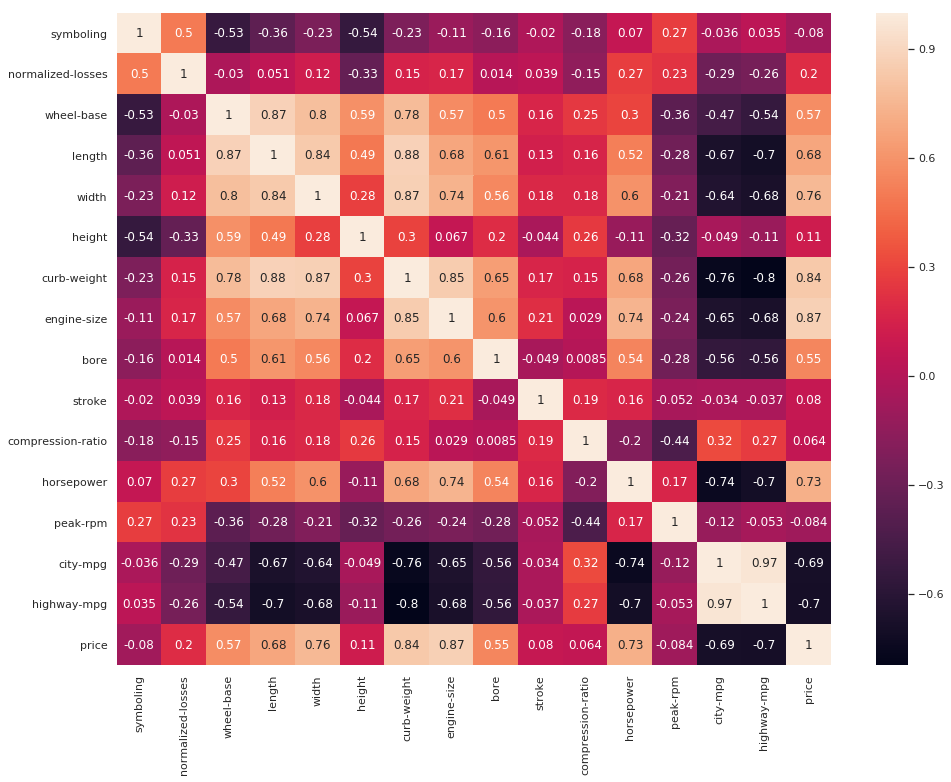

In [42]:
sns.set(rc={'figure.figsize':(16,12)})

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

Text(0.5,0,'price')

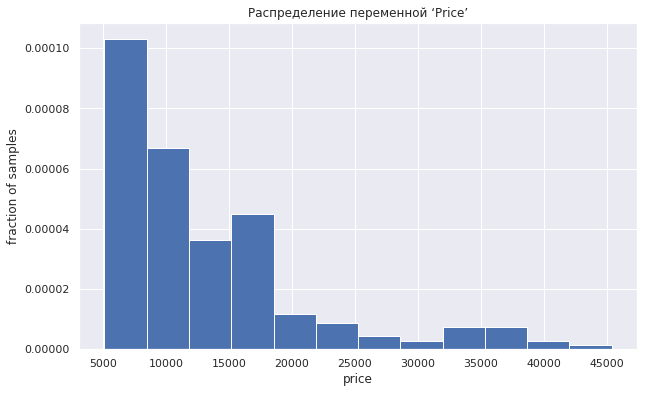

In [67]:
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=12, density=True)
plt.title("Распределение переменной ‘Price’")
plt.ylabel('fraction of samples')
plt.xlabel('price')

In [136]:
kurt = df['price'].kurtosis()
print(kurt)

2.948637293212561


In [137]:
skew = df['price'].skew()
print(skew)

1.7663998888191028


### 5. Визуализировать несколько взаимосвязей между переменными

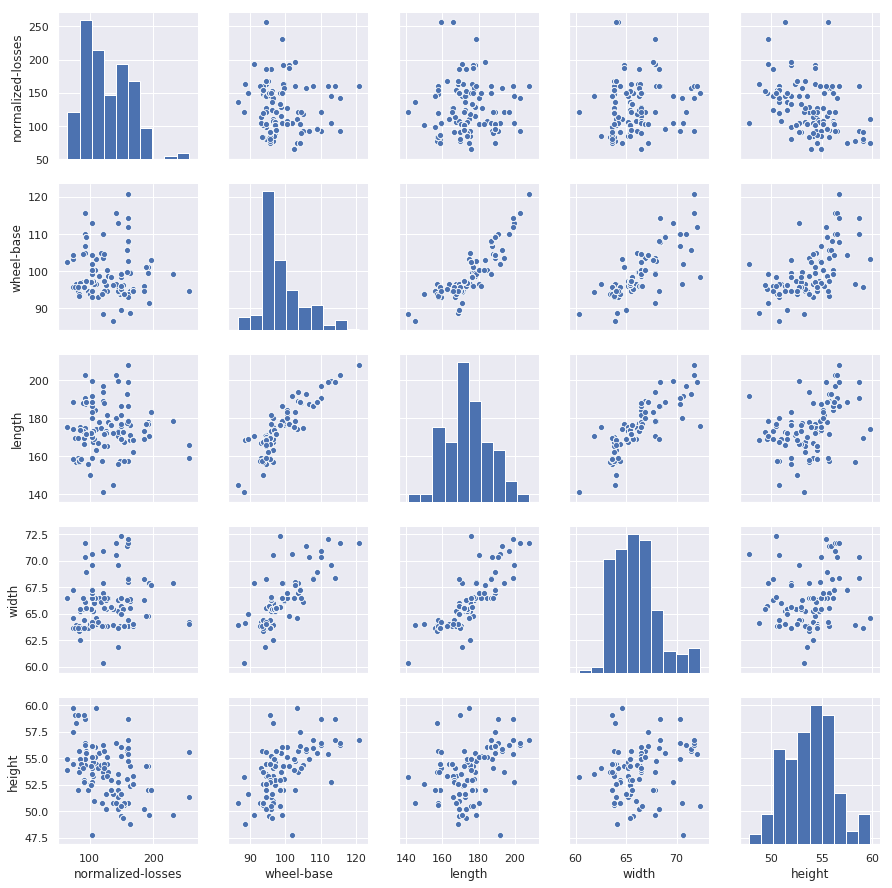

In [138]:
sns.pairplot(df, vars=df.columns[1:6],
                 kind='scatter') 

### 6. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [156]:
df_0.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,158,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,192,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,23875


Проверим равна ли ожидаемая средняя цена автомобилей марок 'toyota' и 'volkswagen'. Т.к. p = 0.85 принимаем
нулевую гипотезу, что значения ожидаемых средних цен равны.

In [170]:
sts.ttest_ind(df_0[df_0['make']=='toyota']['price'], 
              df_0[df_0['make']=='volkswagen']['price'])

Ttest_indResult(statistic=-0.19062675551132266, pvalue=0.8497364855172603)

Проверим равна ли ожидаемая средняя мощность у автомобилей с кузовами седан и хетчбэк. Т.к. p = 0.89 принимаем
нулевую гипотезу, что значения ожидаемых средних мощностей равны.

In [171]:
sts.ttest_ind(df_0[df_0['body-style']=='sedan']['horsepower'], 
              df_0[df_0['body-style']=='hatchback']['horsepower'])

Ttest_indResult(statistic=-0.13567590962565437, pvalue=0.8922438823189027)

Проверим равен ли ожидаемый средний расход топлива на трассе у автомобилей с турбонаддувом и без. Т.к. p = 0.00023 отклоняем нулевую гипотезу и принимаем альтернативную - ожидаемый средний расход топлива на трассе различается.

In [162]:
sts.ttest_ind(df_0[df_0['aspiration']=='std']['highway-mpg'], 
              df_0[df_0['aspiration']=='turbo']['highway-mpg'])

Ttest_indResult(statistic=3.7482125829730943, pvalue=0.00023216238783441753)

Проверим равен ли ожидаемый средний расход топлива в городе у автомобилей с полным и задним приводом. Т.к. p = 0.077 принимаем нулевую гипотезу, что ожидаемый средний расход топлива одинаков.

In [172]:
sts.ttest_ind(df_0[df_0['drive-wheels']=='4wd']['city-mpg'], 
              df_0[df_0['drive-wheels']=='rwd']['city-mpg'])

Ttest_indResult(statistic=1.7881000191873104, pvalue=0.07740925627925965)